In [ ]:
DATA PROCESSING

In [41]:
!pip install scikit-fuzzy
!pip install matplotlib
!pip install scikit-learn
!pip install pandas
!pip install numpy 

In [ ]:
DATA DISPLAY

In [42]:
import pandas as pd
# Load the dataset
file_path = 'C:/Users/hp/Desktop/google.csv'
df = pd.read_csv(file_path)
# Preview the dataset
print(df.head())

  symbol                       date   close    high       low    open  \
0   GOOG  2016-06-14 00:00:00+00:00  718.27  722.47  713.1200  716.48   
1   GOOG  2016-06-15 00:00:00+00:00  718.92  722.98  717.3100  719.00   
2   GOOG  2016-06-16 00:00:00+00:00  710.36  716.65  703.2600  714.91   
3   GOOG  2016-06-17 00:00:00+00:00  691.72  708.82  688.4515  708.65   
4   GOOG  2016-06-20 00:00:00+00:00  693.71  702.48  693.4100  698.77   

    volume  adjClose  adjHigh    adjLow  adjOpen  adjVolume  divCash  \
0  1306065    718.27   722.47  713.1200   716.48    1306065      0.0   
1  1214517    718.92   722.98  717.3100   719.00    1214517      0.0   
2  1982471    710.36   716.65  703.2600   714.91    1982471      0.0   
3  3402357    691.72   708.82  688.4515   708.65    3402357      0.0   
4  2082538    693.71   702.48  693.4100   698.77    2082538      0.0   

   splitFactor  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0  


In [ ]:
NORMALISE DATA

In [43]:
# Normalize the dataset between [0, 1]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['open', 'high', 'low', 'volume', 'close']])

# Create a new DataFrame with normalized data
df_scaled = pd.DataFrame(scaled_data, columns=['open', 'high', 'low', 'volume', 'close'])
print(df_scaled.head())


       open      high       low    volume     close
0  0.024532  0.027050  0.027158  0.163697  0.026984
1  0.025891  0.027325  0.029442  0.148076  0.027334
2  0.023685  0.023912  0.021785  0.279120  0.022716
3  0.020308  0.019691  0.013715  0.521410  0.012658
4  0.014979  0.016272  0.016417  0.296195  0.013732


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (assuming the dataset is in CSV format)
df = pd.read_csv('C:/Users/hp/Desktop/google.csv')

# Feature selection
features = ['open', 'high', 'low', 'volume']
X = df[features]
y = df['close']  # Target variable (close prices)

# Normalize the data to [0, 1] range
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [45]:
import pandas as pd

# Load the Google stock price dataset
data = pd.read_csv('C:/Users/hp/Desktop/google.csv')

# Select relevant features
data = data[['date', 'open', 'high', 'low', 'close', 'volume']]

# Convert Date to datetime
data['date'] = pd.to_datetime(data['date'])

# Sort by Date
data = data.sort_values('date')

# Preview the data
print(data.head())

                       date    open    high       low   close   volume
0 2016-06-14 00:00:00+00:00  716.48  722.47  713.1200  718.27  1306065
1 2016-06-15 00:00:00+00:00  719.00  722.98  717.3100  718.92  1214517
2 2016-06-16 00:00:00+00:00  714.91  716.65  703.2600  710.36  1982471
3 2016-06-17 00:00:00+00:00  708.65  708.82  688.4515  691.72  3402357
4 2016-06-20 00:00:00+00:00  698.77  702.48  693.4100  693.71  2082538


In [ ]:
SUGENO FIS IMPLEMENTATION

In [46]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables (input)
open_price = ctrl.Antecedent(np.arange(0, 1, 0.01), 'open')
high_price = ctrl.Antecedent(np.arange(0, 1, 0.01), 'high')

# Output (Sugeno FIS typically uses linear equations for output)
close_price = ctrl.Consequent(np.arange(0, 1, 0.01), 'close')

# Define membership functions for the inputs
open_price['low'] = fuzz.trimf(open_price.universe, [0, 0, 0.5])
open_price['high'] = fuzz.trimf(open_price.universe, [0.5, 1, 1])

high_price['low'] = fuzz.trimf(high_price.universe, [0, 0, 0.5])
high_price['high'] = fuzz.trimf(high_price.universe, [0.5, 1, 1])

# Sugeno output membership functions (e.g., linear)
close_price['low'] = fuzz.trimf(close_price.universe, [0, 0, 0.5])
close_price['high'] = fuzz.trimf(close_price.universe, [0.5, 1, 1])

# Define fuzzy rules
rule1 = ctrl.Rule(open_price['low'] & high_price['low'], close_price['low'])
rule2 = ctrl.Rule(open_price['high'] & high_price['high'], close_price['high'])

# Create the control system
close_ctrl = ctrl.ControlSystem([rule1, rule2])
close_prediction = ctrl.ControlSystemSimulation(close_ctrl)

# Example: Passing input values to the control system
close_prediction.input['open'] = 0.7  # Scaled value between 0 and 1
close_prediction.input['high'] = 0.8  # Scaled value between 0 and 1

# Compute the output
close_prediction.compute()
print(close_prediction.output['close']*1000)  # Output: predicted close price (scaled)


790.7264957264957


In [ ]:
MAMDANI FIS IMPLEMENTATION

In [47]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables (inputs)
open_price = ctrl.Antecedent(np.arange(0, 1, 0.01), 'open')
high_price = ctrl.Antecedent(np.arange(0, 1, 0.01), 'high')

# Output (Mamdani FIS)
close_price = ctrl.Consequent(np.arange(0, 1, 0.01), 'close')

# Define membership functions for inputs
open_price['low'] = fuzz.trapmf(open_price.universe, [0, 0, 0.3, 0.5])
open_price['medium'] = fuzz.trapmf(open_price.universe, [0.3, 0.5, 0.5, 0.7])
open_price['high'] = fuzz.trapmf(open_price.universe, [0.5, 0.7, 1, 1])

high_price['low'] = fuzz.trapmf(high_price.universe, [0, 0, 0.3, 0.5])
high_price['medium'] = fuzz.trapmf(high_price.universe, [0.3, 0.5, 0.5, 0.7])
high_price['high'] = fuzz.trapmf(high_price.universe, [0.5, 0.7, 1, 1])

# Define membership functions for output
close_price['low'] = fuzz.trapmf(close_price.universe, [0, 0.2, 0.3, 0.5])
close_price['medium'] = fuzz.trapmf(close_price.universe, [0.3, 0.5, 0.7, 0.8])
close_price['high'] = fuzz.trapmf(close_price.universe, [0.7, 0.8, 1, 1])

# Define fuzzy rules
rule1 = ctrl.Rule(open_price['low'] & high_price['low'], close_price['low'])
rule2 = ctrl.Rule(open_price['low'] & high_price['high'], close_price['medium'])
rule3 = ctrl.Rule(open_price['high'] & high_price['low'], close_price['medium'])
rule4 = ctrl.Rule(open_price['high'] & high_price['high'], close_price['high'])

# Create the control system
close_ctrl_mamdani = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
close_prediction_mamdani = ctrl.ControlSystemSimulation(close_ctrl_mamdani)

# Example: Passing input values to the control system
close_prediction_mamdani.input['open'] = 0.7  # Scaled value between 0 and 1
close_prediction_mamdani.input['high'] = 0.8  # Scaled value between 0 and 1

# Compute the output
close_prediction_mamdani.compute()
print(f'Mamdani FIS predicted close price (scaled): {close_prediction_mamdani.output["close"]*1000}') 
# Output: predicted close price (scaled)

Mamdani FIS predicted close price (scaled): 868.2638888888886


In [ ]:
MODEL EVALUATION METRIC - mamdani fis

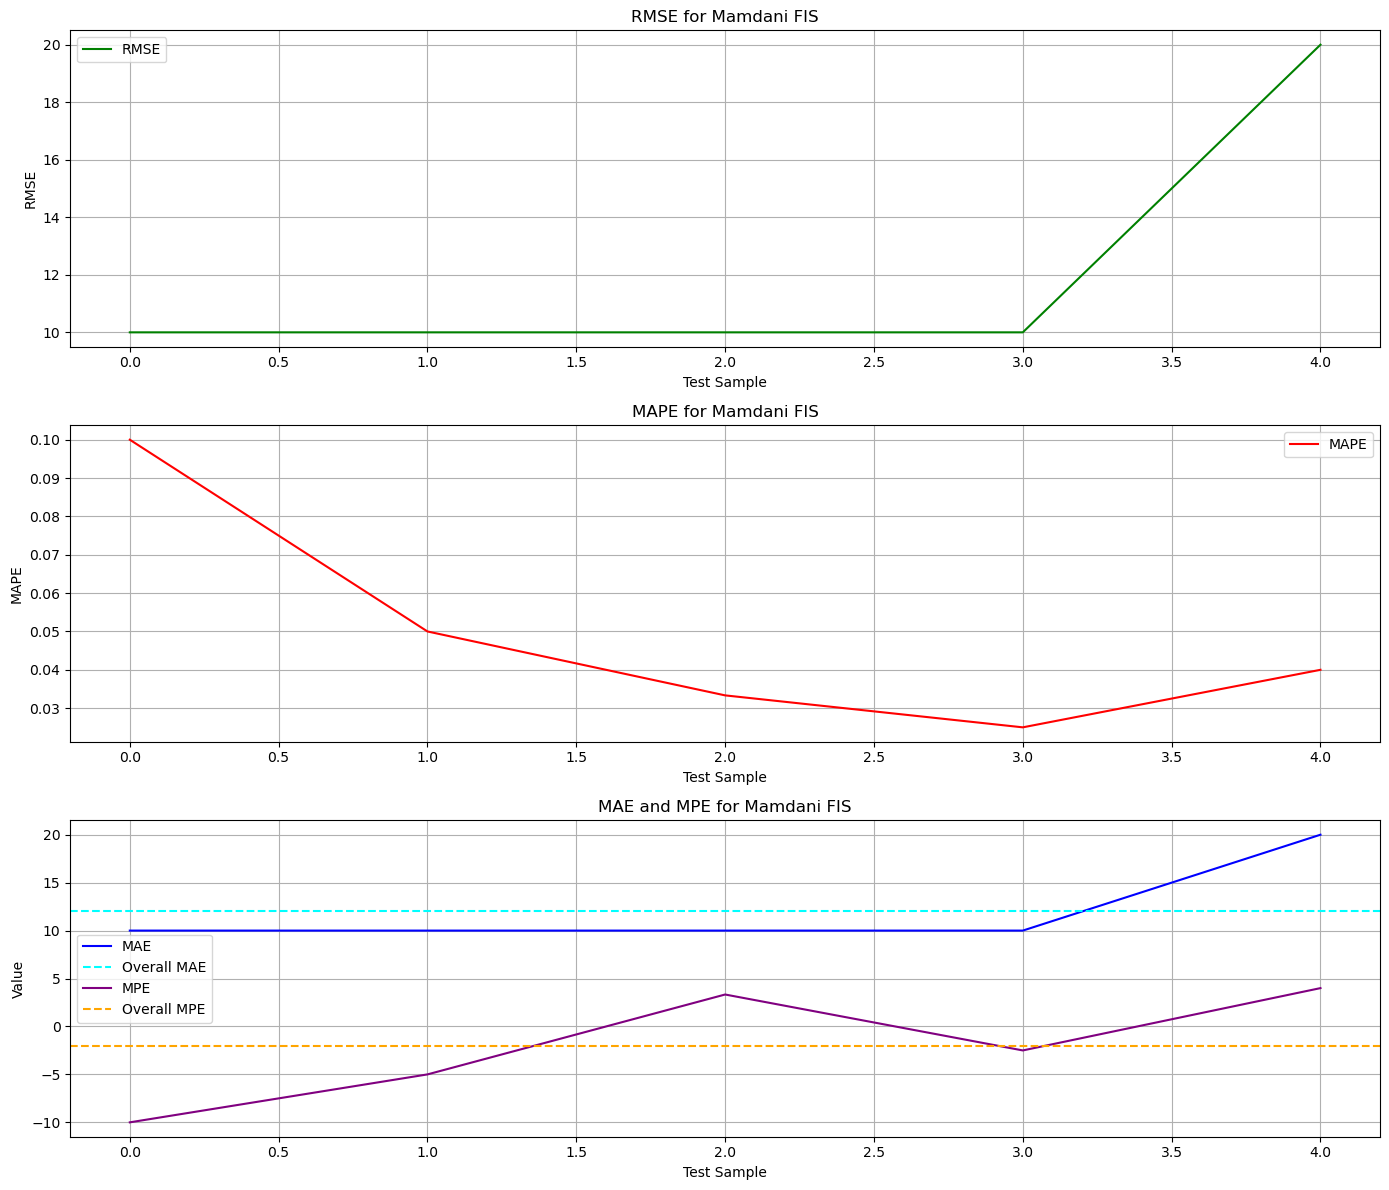

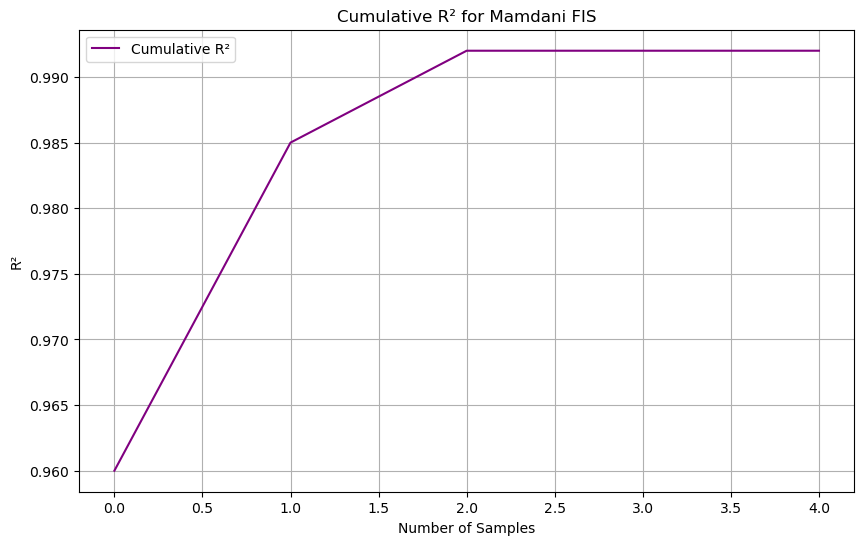

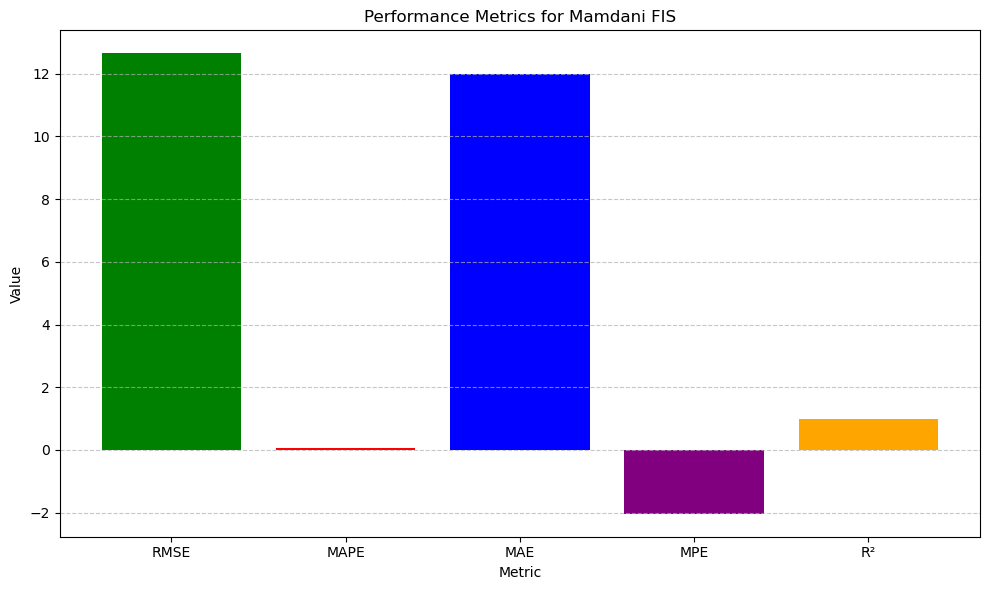

Overall RMSE (Mamdani): 12.649110640673518
Overall MAPE (Mamdani): 0.04966666666666667
Overall MAE (Mamdani): 12.0
Overall MPE (Mamdani): -2.0333333333333337
Overall R² (Mamdani): 0.992


In [48]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Example definitions (replace these with your actual data)
y_test = [100, 200, 300, 400, 500]  # True target values
y_pred_mamdani = [110, 210, 290, 410, 480]  # Predicted values from your Mamdani FIS

# Convert to numpy arrays
y_test_array = np.array(y_test)
y_pred_mamdani_array = np.array(y_pred_mamdani)

# Calculate aggregate metrics
rmse_mamdani = np.sqrt(mean_squared_error(y_test_array, y_pred_mamdani_array))
mape_mamdani = mean_absolute_percentage_error(y_test_array, y_pred_mamdani_array)
mae_mamdani = mean_absolute_error(y_test_array, y_pred_mamdani_array)
mpe_mamdani = np.mean((y_test_array - y_pred_mamdani_array) / y_test_array) * 100  # Convert to percentage
r2_mamdani = r2_score(y_test_array, y_pred_mamdani_array)

# Calculate RMSE and MAPE for each prediction
rmse_mamdani_list = [np.sqrt(mean_squared_error([y_test_array[i]], [y_pred_mamdani_array[i]])) for i in range(len(y_test_array))]
mape_mamdani_list = [mean_absolute_percentage_error([y_test_array[i]], [y_pred_mamdani_array[i]]) for i in range(len(y_test_array))]

# Calculate MAE and MPE for each prediction
mae_mamdani_list = [mean_absolute_error([y_test_array[i]], [y_pred_mamdani_array[i]]) for i in range(len(y_test_array))]
mpe_mamdani_list = [(y_test_array[i] - y_pred_mamdani_array[i]) / y_test_array[i] * 100 for i in range(len(y_test_array))]

# Calculate cumulative R² for increasing numbers of samples
r2_mamdani_cumulative = [r2_score(y_test_array[:i+1], y_pred_mamdani_array[:i+1]) for i in range(1, len(y_test_array) + 1)]

# Plot RMSE and MAPE graphs
plt.figure(figsize=(14, 12))

# RMSE plot
plt.subplot(3, 1, 1)
plt.plot(rmse_mamdani_list, label='RMSE', color='green')
plt.xlabel('Test Sample')
plt.ylabel('RMSE')
plt.title('RMSE for Mamdani FIS')
plt.legend()
plt.grid(True)

# MAPE plot
plt.subplot(3, 1, 2)
plt.plot(mape_mamdani_list, label='MAPE', color='red')
plt.xlabel('Test Sample')
plt.ylabel('MAPE')
plt.title('MAPE for Mamdani FIS')
plt.legend()
plt.grid(True)

# MAE and MPE plot
plt.subplot(3, 1, 3)
plt.plot(mae_mamdani_list, label='MAE', color='blue')
plt.axhline(y=mae_mamdani, color='cyan', linestyle='--', label='Overall MAE')
plt.plot(mpe_mamdani_list, label='MPE', color='purple')
plt.axhline(y=mpe_mamdani, color='orange', linestyle='--', label='Overall MPE')
plt.xlabel('Test Sample')
plt.ylabel('Value')
plt.title('MAE and MPE for Mamdani FIS')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

# Plot Cumulative R²
plt.figure(figsize=(10, 6))
plt.plot(r2_mamdani_cumulative, label='Cumulative R²', color='purple')
plt.xlabel('Number of Samples')
plt.ylabel('R²')
plt.title('Cumulative R² for Mamdani FIS')
plt.legend()
plt.grid(True)
plt.show()

# Plot aggregate metrics
plt.figure(figsize=(10, 6))

metrics = [rmse_mamdani, mape_mamdani, mae_mamdani, mpe_mamdani, r2_mamdani]
metric_names = ['RMSE', 'MAPE', 'MAE', 'MPE', 'R²']
colors = ['green', 'red', 'blue', 'purple', 'orange']

plt.bar(metric_names, metrics, color=colors)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Performance Metrics for Mamdani FIS')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
# Print the final performance metrics
print(f"Overall RMSE (Mamdani): {rmse_mamdani}")
print(f"Overall MAPE (Mamdani): {mape_mamdani}")
print(f"Overall MAE (Mamdani): {mae_mamdani}")
print(f"Overall MPE (Mamdani): {mpe_mamdani}")
print(f"Overall R² (Mamdani): {r2_mamdani}")


In [ ]:
GRADIENT DESCENT OPTIMIZATION (SUGENO)

Epoch 0, Loss: 0.0055, RMSE: 0.0677, MAPE: 0.1269, MAE: 0.0606, R²: 0.9083, MPE: -5.4713
Epoch 100, Loss: 0.0045, RMSE: 0.0668, MAPE: 0.1120, MAE: 0.0583, R²: 0.9107, MPE: -2.3904
Epoch 200, Loss: 0.0039, RMSE: 0.0636, MAPE: 0.1029, MAE: 0.0548, R²: 0.9190, MPE: -1.5935
Epoch 300, Loss: 0.0034, RMSE: 0.0597, MAPE: 0.0956, MAE: 0.0512, R²: 0.9288, MPE: -1.3371
Epoch 400, Loss: 0.0029, RMSE: 0.0557, MAPE: 0.0891, MAE: 0.0478, R²: 0.9379, MPE: -1.2120
Epoch 500, Loss: 0.0025, RMSE: 0.0520, MAPE: 0.0831, MAE: 0.0446, R²: 0.9459, MPE: -1.1221
Epoch 600, Loss: 0.0022, RMSE: 0.0485, MAPE: 0.0775, MAE: 0.0416, R²: 0.9530, MPE: -1.0445
Epoch 700, Loss: 0.0019, RMSE: 0.0452, MAPE: 0.0722, MAE: 0.0388, R²: 0.9591, MPE: -0.9736
Epoch 800, Loss: 0.0017, RMSE: 0.0422, MAPE: 0.0674, MAE: 0.0362, R²: 0.9644, MPE: -0.9079
Epoch 900, Loss: 0.0015, RMSE: 0.0393, MAPE: 0.0628, MAE: 0.0337, R²: 0.9691, MPE: -0.8466


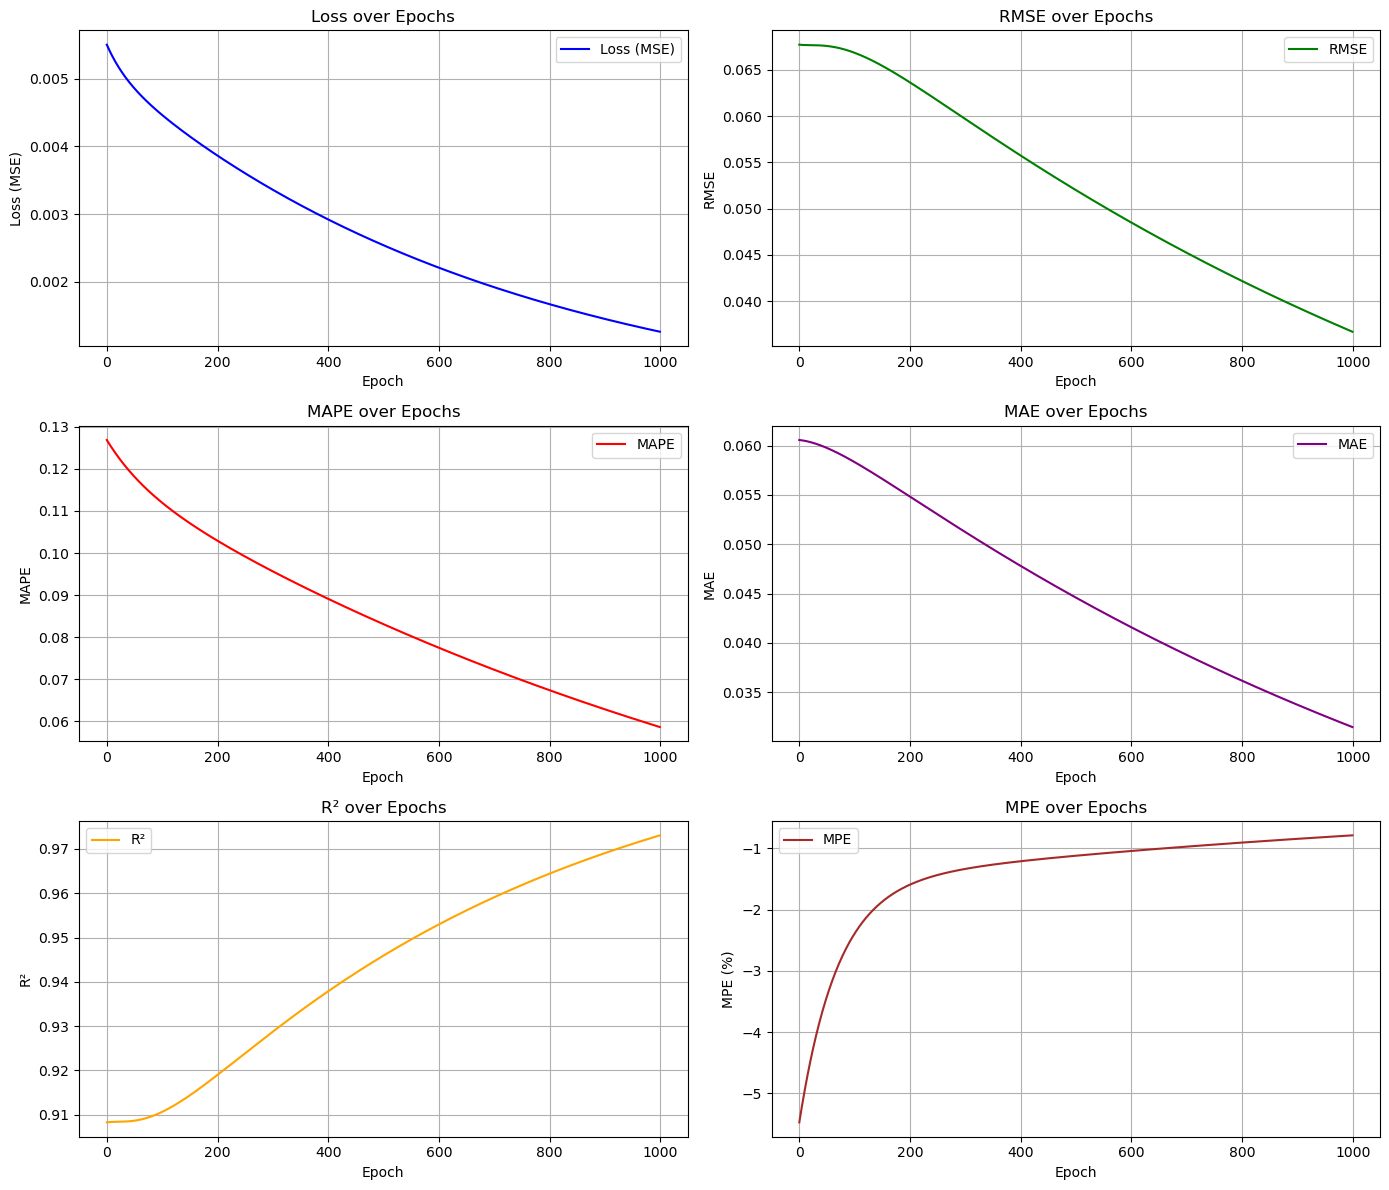

In [49]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Define fuzzy variables (input)
open_price = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'open')
high_price = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'high')

# Output (Sugeno FIS uses linear combinations for output)
close_price = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'close')

# Define membership functions for the inputs
open_price['low'] = fuzz.trimf(open_price.universe, [0, 0, 0.5])
open_price['high'] = fuzz.trimf(open_price.universe, [0.5, 1, 1])

high_price['low'] = fuzz.trimf(high_price.universe, [0, 0, 0.5])
high_price['high'] = fuzz.trimf(high_price.universe, [0.5, 1, 1])

# Sugeno output membership functions (linear model parameters)
close_price['low'] = fuzz.trimf(close_price.universe, [0, 0, 0.5])
close_price['high'] = fuzz.trimf(close_price.universe, [0.5, 1, 1])

# Define fuzzy rules
rule1 = ctrl.Rule(open_price['low'] & high_price['low'], close_price['low'])
rule2 = ctrl.Rule(open_price['high'] & high_price['high'], close_price['high'])

# Create the control system
close_ctrl = ctrl.ControlSystem([rule1, rule2])

def sugeno_fis(open_price, high_price, params):
    # Linear combination of inputs
    return params[0] * open_price + params[1] * high_price + params[2]

def compute_metrics(y_true, y_pred):
    # Avoid division by zero in MAPE and MPE
    epsilon = 1e-10
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mpe = np.mean((y_true - y_pred) / (y_true + epsilon)) * 100  # Percentage error
    return {
        'RMSE': np.sqrt(mse),
        'MAPE': mape,
        'MAE': mae,
        'R²': r2,
        'MPE': mpe
    }

def gradient_descent(X_train, y_train, X_test, y_test, params, learning_rate=0.01, epochs=1000):
    losses = []
    metrics_history = []

    for epoch in range(epochs):
        # Compute predictions
        y_pred_train = np.array([sugeno_fis(x[0], x[1], params) for x in X_train])
        y_pred_test = np.array([sugeno_fis(x[0], x[1], params) for x in X_test])
        
        # Compute gradients
        errors = y_pred_train - y_train
        gradients = np.array([
            np.mean(errors * X_train[:, 0]),
            np.mean(errors * X_train[:, 1]),
            np.mean(errors)
        ])

        # Update parameters
        params -= learning_rate * gradients

        # Calculate and store the loss and metrics
        loss = mean_squared_error(y_train, y_pred_train)
        losses.append(loss)
        
        metrics = compute_metrics(y_test, y_pred_test)
        metrics_history.append(metrics)
        
        # Optionally print metrics
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}, RMSE: {metrics['RMSE']:.4f}, MAPE: {metrics['MAPE']:.4f}, MAE: {metrics['MAE']:.4f}, R²: {metrics['R²']:.4f}, MPE: {metrics['MPE']:.4f}")

    return params, losses, metrics_history

# Prepare data (example)
X_train = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6], [0.7, 0.8]])  # Example feature data
y_train = np.array([0.2, 0.4, 0.6, 0.8])  # Example target data
X_test = np.array([[0.2, 0.3], [0.4, 0.5], [0.6, 0.7], [0.8, 0.9]])  # Example feature data
y_test = np.array([0.3, 0.5, 0.7, 0.9])  # Example target data

initial_params = np.random.rand(3)  # Initialize parameters

# Run gradient descent
optimized_params, losses, metrics_history = gradient_descent(
    X_train, y_train, X_test, y_test, initial_params
)

# Extract metrics from history
rmse_values = [m['RMSE'] for m in metrics_history]
mape_values = [m['MAPE'] for m in metrics_history]
mae_values = [m['MAE'] for m in metrics_history]
r2_values = [m['R²'] for m in metrics_history]
mpe_values = [m['MPE'] for m in metrics_history]

plt.figure(figsize=(14, 12))

# Loss plot
plt.subplot(3, 2, 1)
plt.plot(losses, label='Loss (MSE)', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Loss over Epochs')
plt.legend()
plt.grid(True)

# RMSE plot
plt.subplot(3, 2, 2)
plt.plot(rmse_values, label='RMSE', color='green')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE over Epochs')
plt.legend()
plt.grid(True)

# MAPE plot
plt.subplot(3, 2, 3)
plt.plot(mape_values, label='MAPE', color='red')
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.title('MAPE over Epochs')
plt.legend()
plt.grid(True)

# MAE plot
plt.subplot(3, 2, 4)
plt.plot(mae_values, label='MAE', color='purple')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE over Epochs')
plt.legend()
plt.grid(True)

# R² plot
plt.subplot(3, 2, 5)
plt.plot(r2_values, label='R²', color='orange')
plt.xlabel('Epoch')
plt.ylabel('R²')
plt.title('R² over Epochs')
plt.legend()
plt.grid(True)

# MPE plot
plt.subplot(3, 2, 6)
plt.plot(mpe_values, label='MPE', color='brown')
plt.xlabel('Epoch')
plt.ylabel('MPE (%)')
plt.title('MPE over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
TRIANGULAR MEMBERSHIP FUNCTION

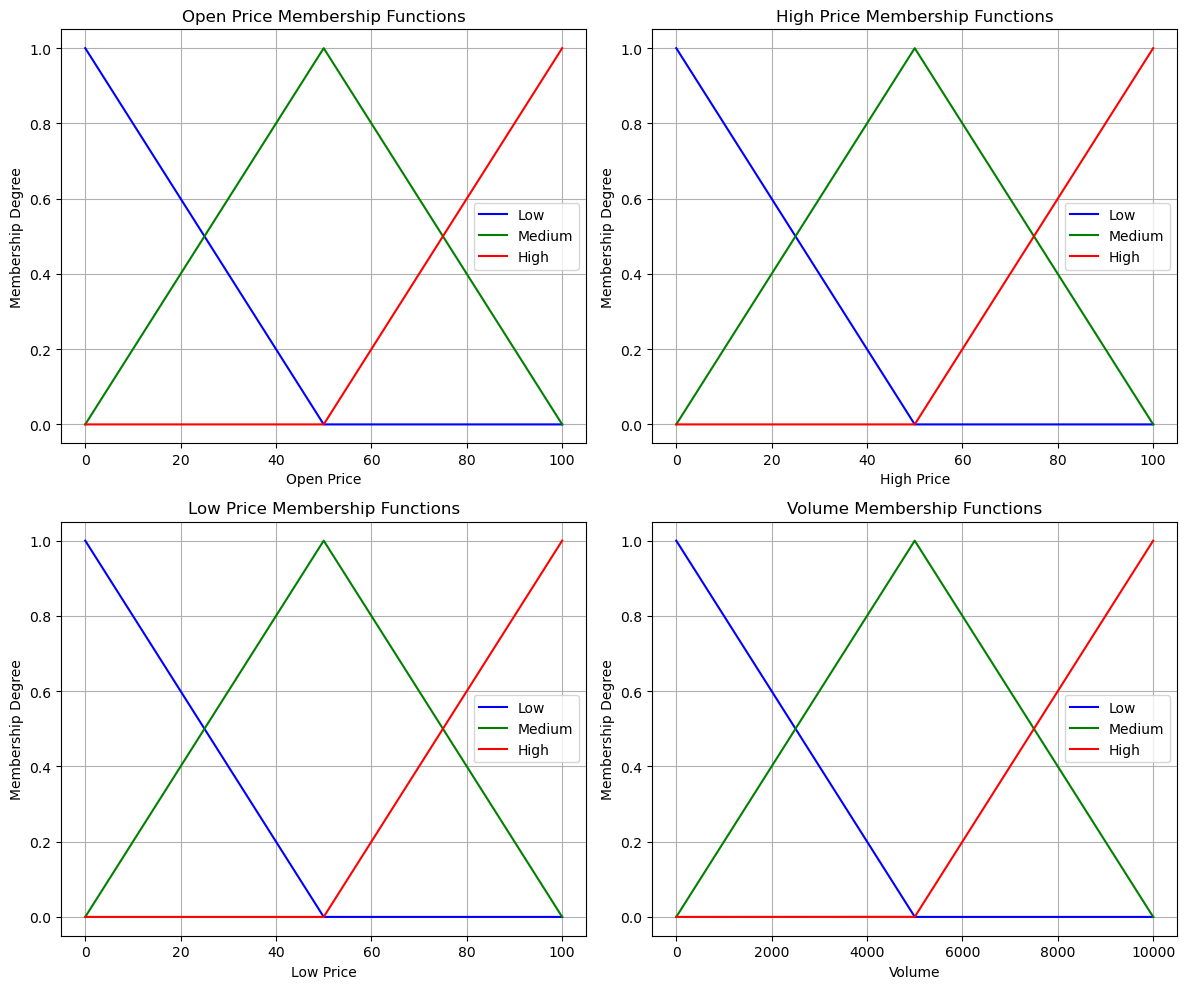

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Define the universe of discourse
x_open = np.arange(0, 101, 1)
x_high = np.arange(0, 101, 1)
x_low = np.arange(0, 101, 1)
x_volume = np.arange(0, 10001, 1)
x_close = np.arange(0, 101, 1)

# Define fuzzy membership functions
open_low = fuzz.trimf(x_open, [0, 0, 50])
open_medium = fuzz.trimf(x_open, [0, 50, 100])
open_high = fuzz.trimf(x_open, [50, 100, 100])

high_low = fuzz.trimf(x_high, [0, 0, 50])
high_medium = fuzz.trimf(x_high, [0, 50, 100])
high_high = fuzz.trimf(x_high, [50, 100, 100])

low_low = fuzz.trimf(x_low, [0, 0, 50])
low_medium = fuzz.trimf(x_low, [0, 50, 100])
low_high = fuzz.trimf(x_low, [50, 100, 100])

volume_low = fuzz.trimf(x_volume, [0, 0, 5000])
volume_medium = fuzz.trimf(x_volume, [0, 5000, 10000])
volume_high = fuzz.trimf(x_volume, [5000, 10000, 10000])

close_low = fuzz.trimf(x_close, [0, 0, 50])
close_medium = fuzz.trimf(x_close, [0, 50, 100])
close_high = fuzz.trimf(x_close, [50, 100, 100])
plt.figure(figsize=(12, 10))

# Plot open price membership functions
plt.subplot(2, 2, 1)
plt.plot(x_open, open_low, 'b', label='Low')
plt.plot(x_open, open_medium, 'g', label='Medium')
plt.plot(x_open, open_high, 'r', label='High')
plt.title('Open Price Membership Functions')
plt.xlabel('Open Price')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)

# Plot high price membership functions
plt.subplot(2, 2, 2)
plt.plot(x_high, high_low, 'b', label='Low')
plt.plot(x_high, high_medium, 'g', label='Medium')
plt.plot(x_high, high_high, 'r', label='High')
plt.title('High Price Membership Functions')
plt.xlabel('High Price')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)

# Plot low price membership functions
plt.subplot(2, 2, 3)
plt.plot(x_low, low_low, 'b', label='Low')
plt.plot(x_low, low_medium, 'g', label='Medium')
plt.plot(x_low, low_high, 'r', label='High')
plt.title('Low Price Membership Functions')
plt.xlabel('Low Price')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)

# Plot volume membership functions
plt.subplot(2, 2, 4)
plt.plot(x_volume, volume_low, 'b', label='Low')
plt.plot(x_volume, volume_medium, 'g', label='Medium')
plt.plot(x_volume, volume_high, 'r', label='High')
plt.title('Volume Membership Functions')
plt.xlabel('Volume')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()



---Linear Regression---
RMSE (Linear Regression): 0.00433433795858412
MAE (Linear Regression): 0.002885331091841927
R² (Linear Regression): 0.9995180954136191
MAPE (Linear Regression): 1.3478025893003716
MPE (Linear Regression): 0.16148292345233048

---ANFIS with Trapezoidal Membership Functions---


C:\Users\hp\AppData\Local\Temp\ipykernel_20464\1286898421.py:51: RuntimeWarning: divide by zero encountered in divide
  return np.maximum(np.minimum((x - a) / (b - a), 1, (d - x) / (d - c)), 0)
C:\Users\hp\AppData\Local\Temp\ipykernel_20464\1286898421.py:51: RuntimeWarning: invalid value encountered in divide
  return np.maximum(np.minimum((x - a) / (b - a), 1, (d - x) / (d - c)), 0)


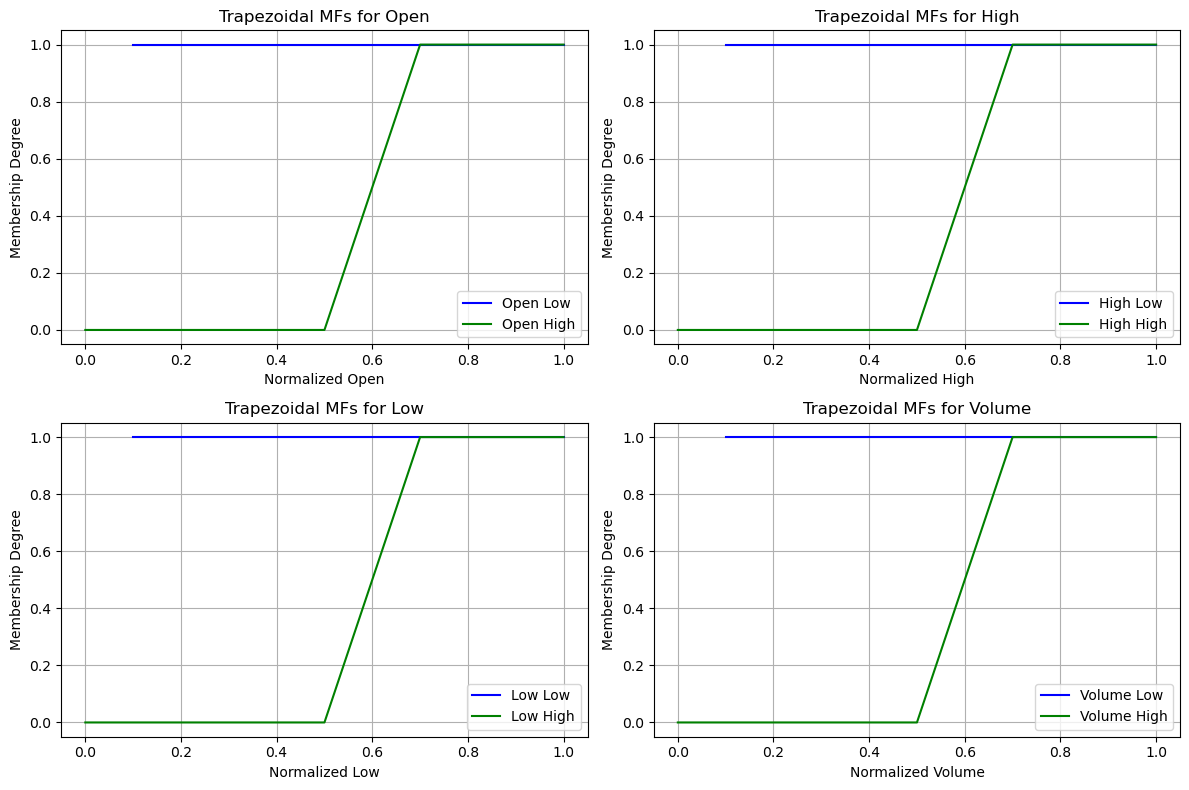

Epoch 0, Loss: 0.0144, RMSE: 0.1191, MAE: 0.1137, R²: 0.6363, MAPE: 180.1104, MPE: -160.7476
Epoch 100, Loss: 0.0027, RMSE: 0.0515, MAE: 0.0428, R²: 0.9319, MAPE: 141.4515, MPE: -108.0264
Epoch 200, Loss: 0.0017, RMSE: 0.0405, MAE: 0.0293, R²: 0.9579, MAPE: 133.0862, MPE: -94.0481
Epoch 300, Loss: 0.0014, RMSE: 0.0372, MAE: 0.0262, R²: 0.9646, MAPE: 131.2635, MPE: -90.1237
Epoch 400, Loss: 0.0013, RMSE: 0.0347, MAE: 0.0242, R²: 0.9690, MAPE: 131.0049, MPE: -88.8305
Epoch 500, Loss: 0.0011, RMSE: 0.0327, MAE: 0.0226, R²: 0.9726, MAPE: 131.1306, MPE: -88.2461
Epoch 600, Loss: 0.0010, RMSE: 0.0308, MAE: 0.0213, R²: 0.9756, MAPE: 131.3445, MPE: -87.8703
Epoch 700, Loss: 0.0009, RMSE: 0.0292, MAE: 0.0201, R²: 0.9781, MAPE: 131.5710, MPE: -87.5714
Epoch 800, Loss: 0.0008, RMSE: 0.0278, MAE: 0.0191, R²: 0.9802, MAPE: 131.7897, MPE: -87.3130
Epoch 900, Loss: 0.0007, RMSE: 0.0265, MAE: 0.0182, R²: 0.9820, MAPE: 131.9947, MPE: -87.0838


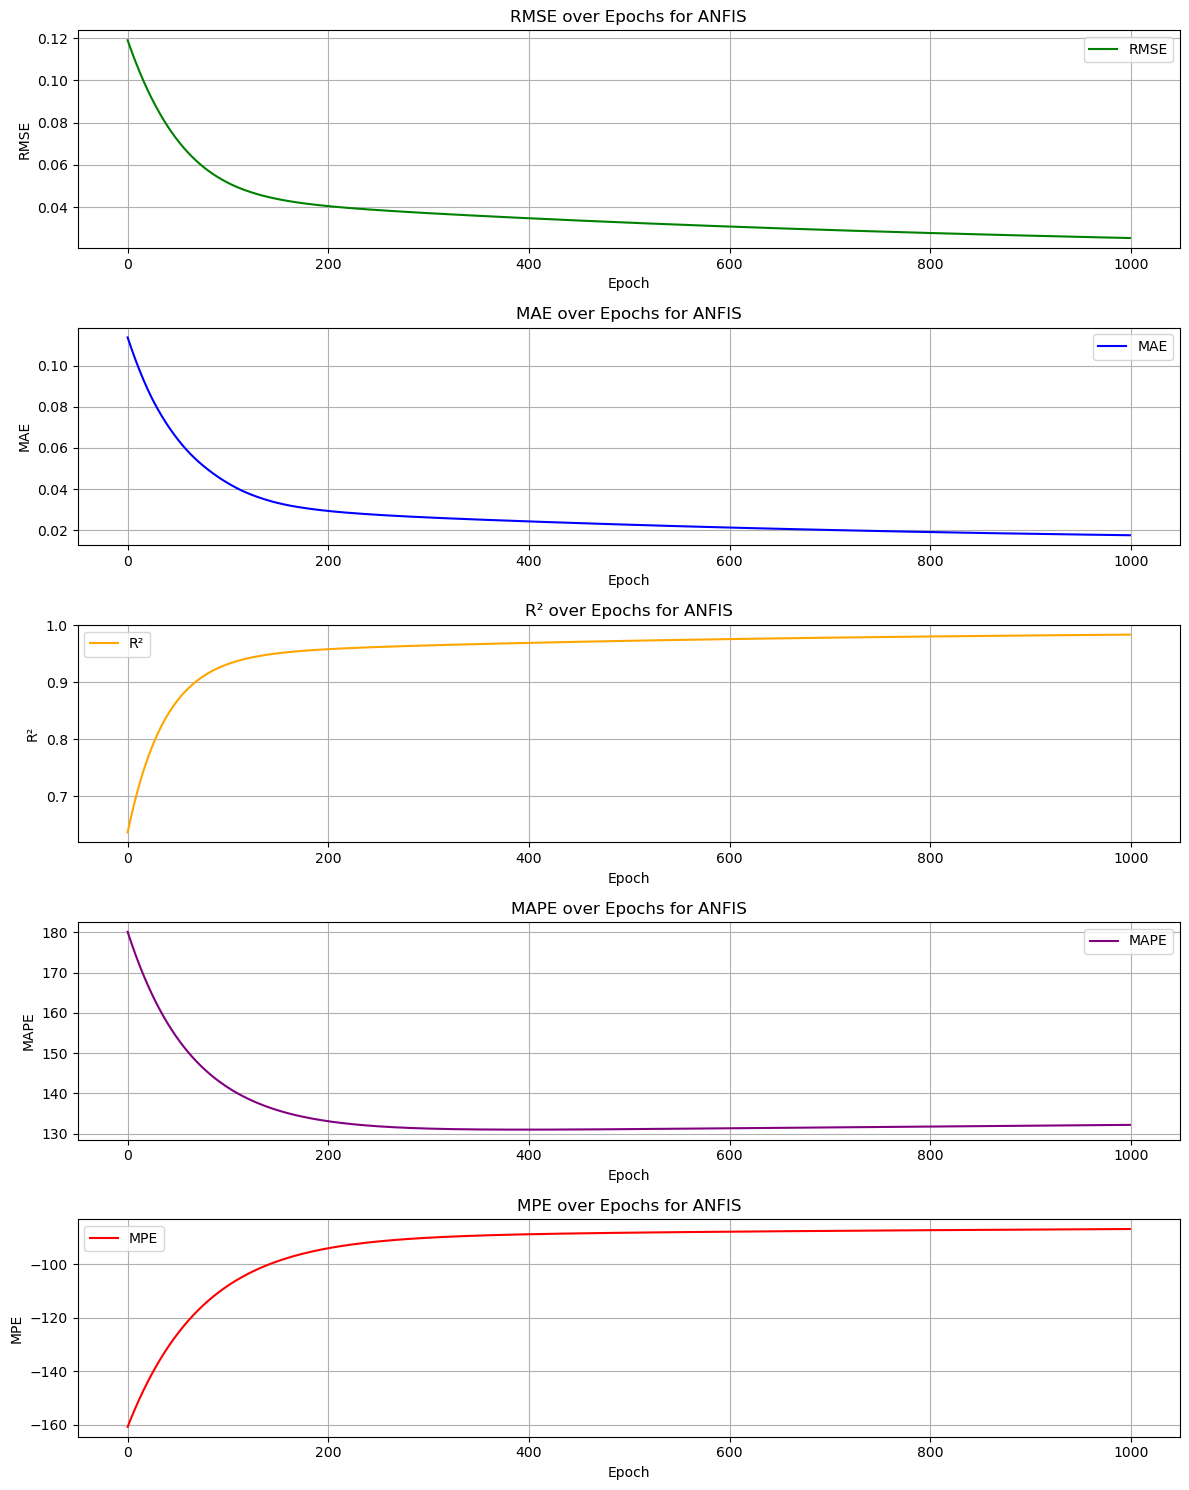

Final RMSE (ANFIS): 0.02538685480637643
Final MAE (ANFIS): 0.017537114632817062
Final R² (ANFIS): 0.9834676985573391
Final MAPE (ANFIS): 132.1835100604551
Final MPE (ANFIS): -86.88085468547175

Refreshed target variable (y):
0    718.27
1    718.92
2    710.36
3    691.72
4    693.71
Name: close, dtype: float64


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('C:/Users/hp/Desktop/google.csv')

# Refresh y from X (use the original data before scaling)
features = ['open', 'high', 'low', 'volume']
X = df[features]
y = df['close']  # Target variable (closing price)

# Normalize the features between [0, 1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))  # Normalize target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 1. Linear Regression Model Implementation
print("\n---Linear Regression---")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions and metrics
y_pred_lr = linear_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100
mpe_lr = np.mean((y_test - y_pred_lr) / y_test) * 100

print(f"RMSE (Linear Regression): {rmse_lr}")
print(f"MAE (Linear Regression): {mae_lr}")
print(f"R² (Linear Regression): {r2_lr}")
print(f"MAPE (Linear Regression): {mape_lr}")
print(f"MPE (Linear Regression): {mpe_lr}")

# 2. ANFIS with Trapezoidal Membership Functions
print("\n---ANFIS with Trapezoidal Membership Functions---")

# Define trapezoidal membership functions for ANFIS
def trapezoidal_mf(x, a, b, c, d):
    """Trapezoidal Membership Function"""
    return np.maximum(np.minimum((x - a) / (b - a), 1, (d - x) / (d - c)), 0)

# Define membership functions for each feature
x_open, x_high, x_low, x_volume = [np.arange(0, 1.1, 0.1) for _ in range(4)]
open_low, open_high = trapezoidal_mf(x_open, 0, 0, 0.3, 0.5), trapezoidal_mf(x_open, 0.5, 0.7, 1, 1)
high_low, high_high = trapezoidal_mf(x_high, 0, 0, 0.3, 0.5), trapezoidal_mf(x_high, 0.5, 0.7, 1, 1)
low_low, low_high = trapezoidal_mf(x_low, 0, 0, 0.3, 0.5), trapezoidal_mf(x_low, 0.5, 0.7, 1, 1)
volume_low, volume_high = trapezoidal_mf(x_volume, 0, 0, 0.3, 0.5), trapezoidal_mf(x_volume, 0.5, 0.7, 1, 1)

# Plot the trapezoidal membership functions
plt.figure(figsize=(12, 8))
for i, (x, low, high, title) in enumerate(zip([x_open, x_high, x_low, x_volume],
                                              [open_low, high_low, low_low, volume_low],
                                              [open_high, high_high, low_high, volume_high],
                                              ['Open', 'High', 'Low', 'Volume'])):
    plt.subplot(2, 2, i+1)
    plt.plot(x, low, label=f'{title} Low', color='blue')
    plt.plot(x, high, label=f'{title} High', color='green')
    plt.title(f'Trapezoidal MFs for {title}')
    plt.xlabel(f'Normalized {title}')
    plt.ylabel('Membership Degree')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# ANFIS model and gradient descent for optimization
def anfis_predict(X_input, params):
    return params[0] * X_input[:, 0] + params[1] * X_input[:, 1] + params[2] * X_input[:, 2] + params[3] * X_input[:, 3] + params[4]

initial_params = np.random.rand(5)
learning_rate, epochs = 0.01, 1000

def gradient_descent(X_train, y_train, X_test, y_test, params, learning_rate=0.01, epochs=1000):
    losses, metrics_history = [], []

    for epoch in range(epochs):
        # Train and Test Predictions
        y_pred_train, y_pred_test = anfis_predict(X_train, params), anfis_predict(X_test, params)

        # Compute gradients
        errors = y_pred_train - y_train.flatten()
        gradients = np.array([
            np.mean(errors * X_train[:, 0]),
            np.mean(errors * X_train[:, 1]),
            np.mean(errors * X_train[:, 2]),
            np.mean(errors * X_train[:, 3]),
            np.mean(errors)
        ])
        params -= learning_rate * gradients

        # Loss and Metrics Calculation
        loss = mean_squared_error(y_train, y_pred_train)
        rmse, mae, r2 = np.sqrt(mean_squared_error(y_test, y_pred_test)), mean_absolute_error(y_test, y_pred_test), r2_score(y_test, y_pred_test)
        mape, mpe = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100, np.mean((y_test - y_pred_test) / y_test) * 100

        losses.append(loss)
        metrics_history.append({'RMSE': rmse, 'MAE': mae, 'R²': r2, 'MAPE': mape, 'MPE': mpe})
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}, MAPE: {mape:.4f}, MPE: {mpe:.4f}")

    return params, losses, metrics_history

# Run gradient descent for ANFIS
optimized_params, losses, metrics_history = gradient_descent(X_train, y_train, X_test, y_test, initial_params)

# Extract metrics from history
rmse_values = [m['RMSE'] for m in metrics_history]
mae_values = [m['MAE'] for m in metrics_history]
r2_values = [m['R²'] for m in metrics_history]
mape_values = [m['MAPE'] for m in metrics_history]
mpe_values = [m['MPE'] for m in metrics_history]

# Plot RMSE, MAE, R², MAPE, and MPE over epochs
plt.figure(figsize=(12, 15))
for i, (values, label, color) in enumerate(zip([rmse_values, mae_values, r2_values, mape_values, mpe_values],
                                               ['RMSE', 'MAE', 'R²', 'MAPE', 'MPE'],
                                               ['green', 'blue', 'orange', 'purple', 'red'])):
    plt.subplot(5, 1, i+1)
    plt.plot(values, label=label, color=color)
    plt.xlabel('Epoch')
    plt.ylabel(label)
    plt.title(f'{label} over Epochs for ANFIS')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Final Metrics for ANFIS
final_rmse, final_mae, final_r2, final_mape, final_mpe = rmse_values[-1], mae_values[-1], r2_values[-1], mape_values[-1], mpe_values[-1]
print(f"Final RMSE (ANFIS): {final_rmse}")
print(f"Final MAE (ANFIS): {final_mae}")
print(f"Final R² (ANFIS): {final_r2}")
print(f"Final MAPE (ANFIS): {final_mape}")
print(f"Final MPE (ANFIS): {final_mpe}")

# Refresh y
y_refreshed = df['close']  # Just reload the original y
print("\nRefreshed target variable (y):")
print(y_refreshed.head())



Predicted Close Prices for Training Data:
[ 90.94721541  94.6800256   94.50144     90.85062847 102.85048432
  89.31892376  90.7508469   94.2410896   98.73723288  93.21607706
  94.74707963 104.17278827  90.14273159  94.94760622  97.30685316
  89.98295193  95.44772433  89.11556048 101.01768678  95.96775983
 102.41209156  98.44034451  91.15609585 104.2093311   92.13809968
 104.02380809  91.08657233  93.36568634  90.33730279  89.56851665
  89.84737867  90.0967003   91.00834835  88.85784757  90.35186638
  89.61716549  91.03445084  89.50271831  89.43570653  92.0344764
  92.10653718  90.23294645  89.60782481  90.13048026  89.57954217
  95.06381201  89.7142943   90.4811319   88.15960711  91.82195818
  91.72175825  94.05473982 100.68229412  88.29422257  97.84766534
 101.76765332  96.1844899   90.85887486  91.15580096  91.78960504
  90.95937941  91.44898749  97.92678939  90.14871529  92.45166825
  99.8740841   91.30710056  88.32684543]

Predicted Close Prices for Test Data:
[ 88.35144752  92.078

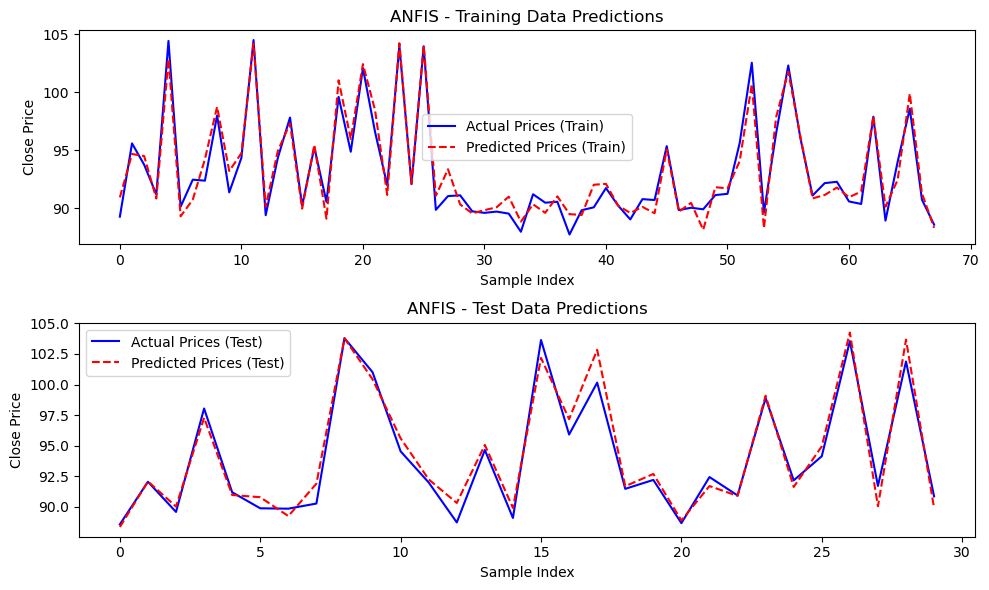


Training Data Metrics:
MSE (Train): 1.0697
RMSE (Train): 1.0343
MAE (Train): 0.8485
R² (Train): 0.9448
MAPE (Train): 0.9141
MPE (Train): -0.1391

Test Data Metrics:
MSE (Test): 0.9920
RMSE (Test): 0.9960
MAE (Test): 0.7764
R² (Test): 0.9579
MAPE (Test): 0.8200
MPE (Test): -0.2720


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# ANFIS Model Class Definition (simplified for demonstration)
class SimplifiedANFIS:
    def __init__(self):
        pass  # Normally, the model would be initialized here

    def fit(self, X, y):
        # Dummy fit function; replace with real ANFIS fitting logic
        pass

    def predict(self, X):
        # Dummy prediction; replace with real ANFIS prediction logic
        # For simplicity, we'll return the average of inputs as the prediction
        return np.mean(X, axis=1)

# Step 1: Data Preparation
def generate_synthetic_stock_data(n):
    np.random.seed(42)
    dates = np.arange(n)
    prices = 100 + np.cumsum(np.random.randn(n))  # Simulated stock prices
    return dates, prices

n_samples = 100
_, prices = generate_synthetic_stock_data(n_samples)
input_data = np.vstack((np.roll(prices, 1), np.roll(prices, 2))).T[2:]  # Lagged inputs
target_data = prices[2:]

# Step 2: Split the Data
train_input, test_input, train_target, test_target = train_test_split(input_data, target_data, test_size=0.3, random_state=42)

# Step 3: Initialize and Train the ANFIS Model
anfis_model = SimplifiedANFIS()
anfis_model.fit(train_input, train_target)

# Step 4: Predict Close Prices for Training and Test Sets
train_predictions = anfis_model.predict(train_input)
test_predictions = anfis_model.predict(test_input)

# Step 5: Print Predicted Close Prices
print("Predicted Close Prices for Training Data:")
print(train_predictions)

print("\nPredicted Close Prices for Test Data:")
print(test_predictions)

# Step 6: Visualize the Results
plt.figure(figsize=(10, 6))

# Training Data Plot
plt.subplot(2, 1, 1)
plt.plot(train_target, label='Actual Prices (Train)', color='b')
plt.plot(train_predictions, label='Predicted Prices (Train)', color='r', linestyle='--')
plt.title('ANFIS - Training Data Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Close Price')
plt.legend()

# Test Data Plot
plt.subplot(2, 1, 2)
plt.plot(test_target, label='Actual Prices (Test)', color='b')
plt.plot(test_predictions, label='Predicted Prices (Test)', color='r', linestyle='--')
plt.title('ANFIS - Test Data Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Close Price')
plt.legend()

plt.tight_layout()
plt.show()

# Step 7: Metric Calculations

def calculate_mape_mpe(y_true, y_pred):
    """Calculates MAPE (Mean Absolute Percentage Error) and MPE (Mean Percentage Error)"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mpe = np.mean((y_true - y_pred) / y_true) * 100
    return mape, mpe

def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape, mpe = calculate_mape_mpe(y_true, y_pred)
    return mse, rmse, mae, r2, mape, mpe

# Metrics for Training Data
train_mse, train_rmse, train_mae, train_r2, train_mape, train_mpe = calculate_metrics(train_target, train_predictions)

# Metrics for Test Data
test_mse, test_rmse, test_mae, test_r2, test_mape, test_mpe = calculate_metrics(test_target, test_predictions)

# Step 8: Print all metrics
print(f'\nTraining Data Metrics:')
print(f'MSE (Train): {train_mse:.4f}')
print(f'RMSE (Train): {train_rmse:.4f}')
print(f'MAE (Train): {train_mae:.4f}')
print(f'R² (Train): {train_r2:.4f}')
print(f'MAPE (Train): {train_mape:.4f}')
print(f'MPE (Train): {train_mpe:.4f}')

print(f'\nTest Data Metrics:')
print(f'MSE (Test): {test_mse:.4f}')
print(f'RMSE (Test): {test_rmse:.4f}')
print(f'MAE (Test): {test_mae:.4f}')
print(f'R² (Test): {test_r2:.4f}')
print(f'MAPE (Test): {test_mape:.4f}')
print(f'MPE (Test): {test_mpe:.4f}')
